# Overfitting and Underfitting

Practice overfitting/underfitting with the IMDB text sentiment classification dataset.

In [41]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## Data Prep

Download and multi-hot encode word vectors:

In [42]:
%%time
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indicies in enumerate(sequences):
        results[i, word_indicies] = 1.0 # set specific indicies of results[i] to 1s
    
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

CPU times: user 3.33 s, sys: 1.11 s, total: 4.45 s
Wall time: 4.47 s


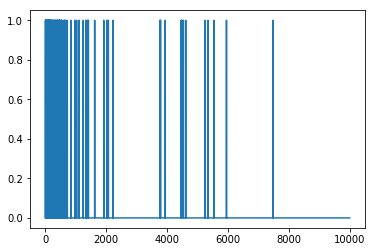

In [43]:
plt.plot(train_data[0])

## Modeling

Baseline Model

In [44]:
baseline_model = keras.Sequential([
    # "input_shape" is all that is needed so that ".summary" works
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy']
                      )

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Train baseline model
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                      validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5066 - acc: 0.7800 - binary_crossentropy: 0.5066 - val_loss: 0.3601 - val_acc: 0.8712 - val_binary_crossentropy: 0.3601
Epoch 2/20
 - 3s - loss: 0.2695 - acc: 0.9059 - binary_crossentropy: 0.2695 - val_loss: 0.2900 - val_acc: 0.8877 - val_binary_crossentropy: 0.2900
Epoch 3/20
 - 3s - loss: 0.1967 - acc: 0.9306 - binary_crossentropy: 0.1967 - val_loss: 0.2855 - val_acc: 0.8859 - val_binary_crossentropy: 0.2855
Epoch 4/20
 - 3s - loss: 0.1586 - acc: 0.9457 - binary_crossentropy: 0.1586 - val_loss: 0.3047 - val_acc: 0.8790 - val_binary_crossentropy: 0.3047
Epoch 5/20
 - 3s - loss: 0.1303 - acc: 0.9567 - binary_crossentropy: 0.1303 - val_loss: 0.3205 - val_acc: 0.8773 - val_binary_crossentropy: 0.3205
Epoch 6/20
 - 3s - loss: 0.1077 - acc: 0.9669 - binary_crossentropy: 0.1077 - val_loss: 0.3456 - val_acc: 0.8746 - val_binary_crossentropy: 0.3456
Epoch 7/20
 - 3s - loss: 0.0884 - acc: 0.9738 - binary_crossentropy:

Smaller model

In [46]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [47]:
# train smaller model
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5713 - acc: 0.7741 - binary_crossentropy: 0.5713 - val_loss: 0.4659 - val_acc: 0.8430 - val_binary_crossentropy: 0.4659
Epoch 2/20
 - 3s - loss: 0.3751 - acc: 0.8789 - binary_crossentropy: 0.3751 - val_loss: 0.3561 - val_acc: 0.8725 - val_binary_crossentropy: 0.3561
Epoch 3/20
 - 3s - loss: 0.2833 - acc: 0.9056 - binary_crossentropy: 0.2833 - val_loss: 0.3122 - val_acc: 0.8814 - val_binary_crossentropy: 0.3122
Epoch 4/20
 - 3s - loss: 0.2339 - acc: 0.9211 - binary_crossentropy: 0.2339 - val_loss: 0.2918 - val_acc: 0.8858 - val_binary_crossentropy: 0.2918
Epoch 5/20
 - 3s - loss: 0.2014 - acc: 0.9326 - binary_crossentropy: 0.2014 - val_loss: 0.2843 - val_acc: 0.8872 - val_binary_crossentropy: 0.2843
Epoch 6/20
 - 3s - loss: 0.1783 - acc: 0.9402 - binary_crossentropy: 0.1783 - val_loss: 0.2837 - val_acc: 0.8868 - val_binary_crossentropy: 0.2837
Epoch 7/20
 - 3s - loss: 0.1595 - acc: 0.9474 - binary_crossentropy:

Bigger Model

In [33]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [34]:
# train bigger model
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.3545 - acc: 0.8480 - binary_crossentropy: 0.3545 - val_loss: 0.2858 - val_acc: 0.8825 - val_binary_crossentropy: 0.2858
Epoch 2/20
 - 3s - loss: 0.1362 - acc: 0.9510 - binary_crossentropy: 0.1362 - val_loss: 0.3283 - val_acc: 0.8740 - val_binary_crossentropy: 0.3283
Epoch 3/20
 - 3s - loss: 0.0391 - acc: 0.9899 - binary_crossentropy: 0.0391 - val_loss: 0.4387 - val_acc: 0.8723 - val_binary_crossentropy: 0.4387
Epoch 4/20
 - 3s - loss: 0.0055 - acc: 0.9992 - binary_crossentropy: 0.0055 - val_loss: 0.5781 - val_acc: 0.8678 - val_binary_crossentropy: 0.5781
Epoch 5/20
 - 3s - loss: 6.6356e-04 - acc: 1.0000 - binary_crossentropy: 6.6356e-04 - val_loss: 0.6596 - val_acc: 0.8696 - val_binary_crossentropy: 0.6596
Epoch 6/20
 - 3s - loss: 2.0440e-04 - acc: 1.0000 - binary_crossentropy: 2.0440e-04 - val_loss: 0.7037 - val_acc: 0.8704 - val_binary_crossentropy: 0.7037
Epoch 7/20
 - 3s - loss: 1.2528e-04 - acc: 1.0000 - 

## Eval

Plot losses of the 3 models

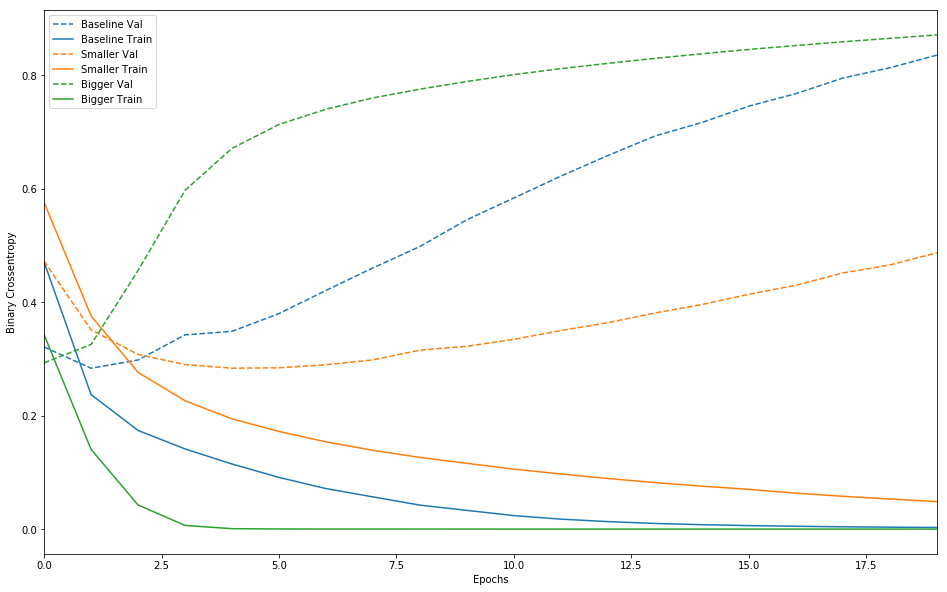

In [32]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Modeling with Regularization

Model with L2 regularization

In [36]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5432 - acc: 0.8097 - binary_crossentropy: 0.5045 - val_loss: 0.4016 - val_acc: 0.8696 - val_binary_crossentropy: 0.3607
Epoch 2/20
 - 3s - loss: 0.3211 - acc: 0.9014 - binary_crossentropy: 0.2748 - val_loss: 0.3409 - val_acc: 0.8857 - val_binary_crossentropy: 0.2907
Epoch 3/20
 - 3s - loss: 0.2679 - acc: 0.9250 - binary_crossentropy: 0.2150 - val_loss: 0.3450 - val_acc: 0.8821 - val_binary_crossentropy: 0.2903
Epoch 4/20
 - 3s - loss: 0.2437 - acc: 0.9334 - binary_crossentropy: 0.1872 - val_loss: 0.3443 - val_acc: 0.8843 - val_binary_crossentropy: 0.2869
Epoch 5/20
 - 3s - loss: 0.2260 - acc: 0.9434 - binary_crossentropy: 0.1676 - val_loss: 0.3548 - val_acc: 0.8819 - val_binary_crossentropy: 0.2957
Epoch 6/20
 - 3s - loss: 0.2154 - acc: 0.9474 - binary_crossentropy: 0.1555 - val_loss: 0.3728 - val_acc: 0.8758 - val_binary_crossentropy: 0.3125
Epoch 7/20
 - 3s - loss: 0.2085 - acc: 0.9496 - binary_crossentropy:

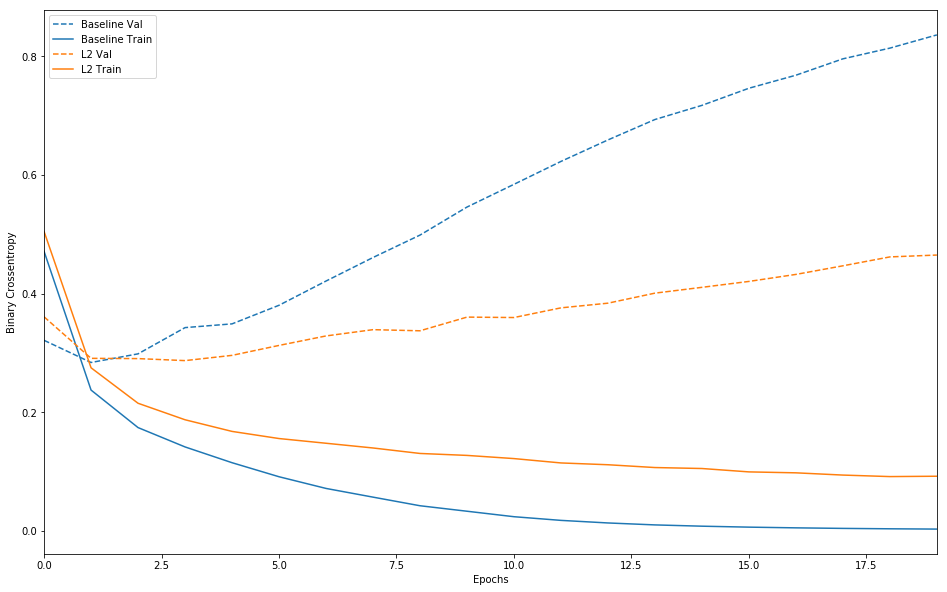

In [37]:
plot_history([('baseline', baseline_history),
              ('L2', l2_model_history)])

Model with Dropout

In [38]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                  validation_data=(test_data, test_labels), verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6409 - acc: 0.6350 - binary_crossentropy: 0.6409 - val_loss: 0.5045 - val_acc: 0.8418 - val_binary_crossentropy: 0.5045
Epoch 2/20
 - 3s - loss: 0.4707 - acc: 0.8020 - binary_crossentropy: 0.4707 - val_loss: 0.3508 - val_acc: 0.8776 - val_binary_crossentropy: 0.3508
Epoch 3/20
 - 3s - loss: 0.3652 - acc: 0.8610 - binary_crossentropy: 0.3652 - val_loss: 0.2983 - val_acc: 0.8865 - val_binary_crossentropy: 0.2983
Epoch 4/20
 - 3s - loss: 0.3019 - acc: 0.8916 - binary_crossentropy: 0.3019 - val_loss: 0.2770 - val_acc: 0.8878 - val_binary_crossentropy: 0.2770
Epoch 5/20
 - 3s - loss: 0.2530 - acc: 0.9141 - binary_crossentropy: 0.2530 - val_loss: 0.2813 - val_acc: 0.8877 - val_binary_crossentropy: 0.2813
Epoch 6/20
 - 3s - loss: 0.2247 - acc: 0.9262 - binary_crossentropy: 0.2247 - val_loss: 0.2882 - val

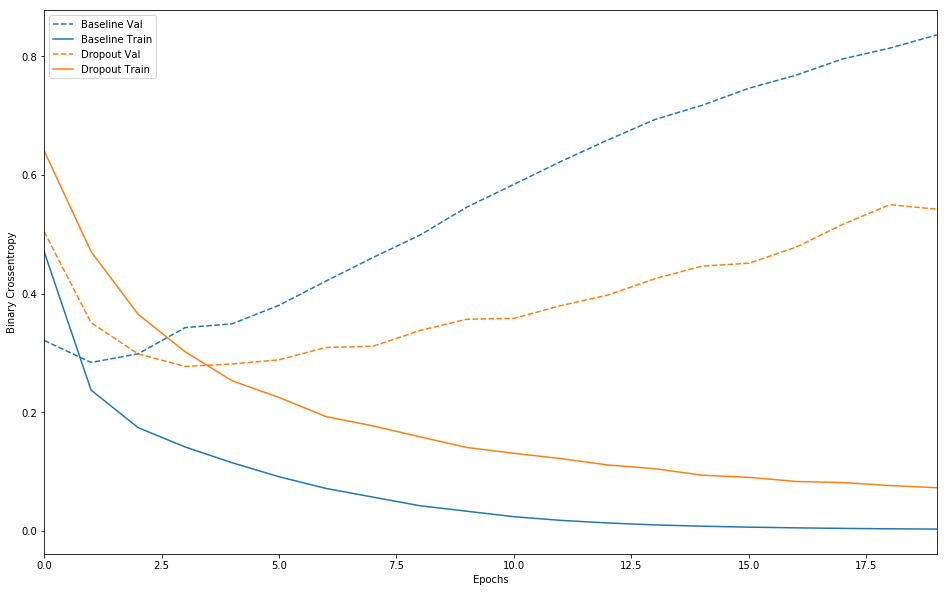

In [40]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])